In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [32]:
PPP <- read_csv('./PPP_with_FIPS.csv')

Rows: 1236696 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (28): DateApproved, BorrowerName, BorrowerAddress, BorrowerCity, Borrowe...
dbl (12): LoanNumber, SBAOfficeCode, Term, SBAGuarantyPercentage, InitialApp...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
system('R CMD SHLIB ./C_files/kde.c')

dyn.load('./C_files/kde.so')

kde <- function(x,m){

    x <- as.double(x)

    m <- as.integer(m)

    g <- as.double(seq(min(x),max(x),length.out = m))

    n <- as.integer(length(x))

    bw <- as.double(1.06 * min(sd(x),IQR(x)) * n^(-1/5))

    y <- double(m)

    a <- .C('KDE',n=n,m=m,x=x,g=g,y=y,bw=bw)

    return(a$y)

}

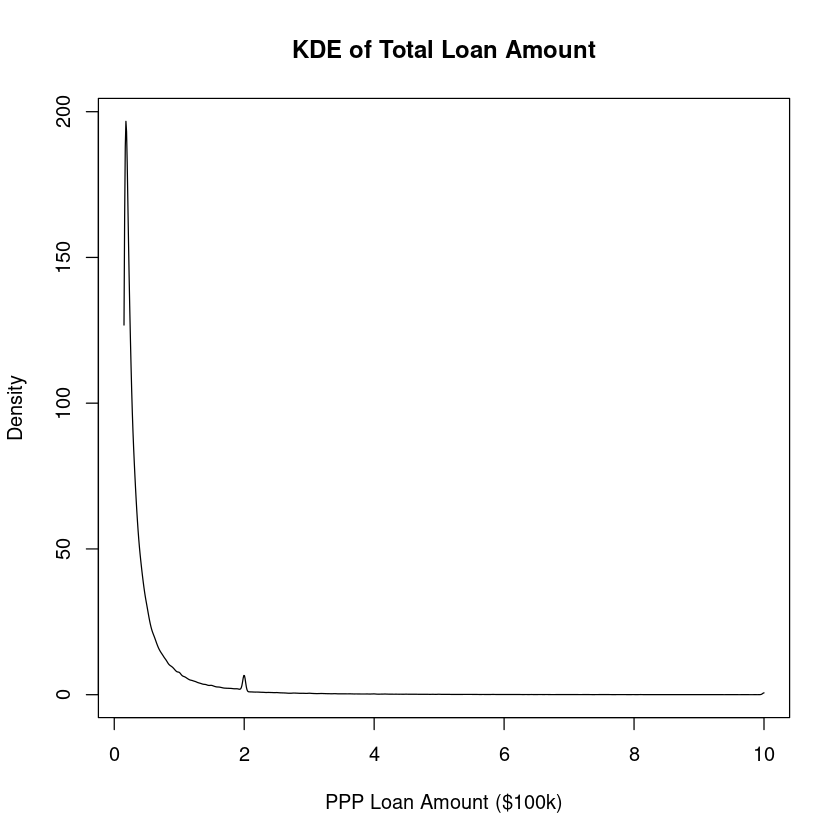

In [38]:
total <- PPP$CurrentApprovalAmount / 1e6
m <- 1000

est1 <- kde(total, m)

plot(seq(min(total),max(total),length.out = m), est1,
    type = 'l',
    xlab = 'PPP Loan Amount ($100k)',
    ylab = 'Density')
title("KDE of Total Loan Amount")

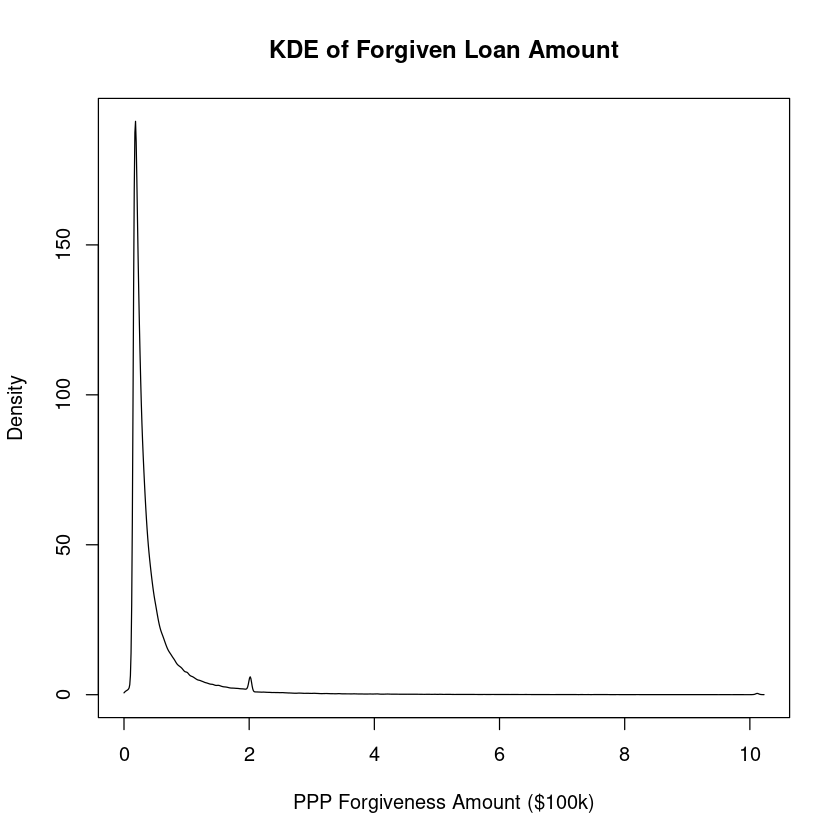

In [39]:
forgive <- PPP[!is.na(PPP$ForgivenessAmount),'ForgivenessAmount'] %>% pull() / 1e6

m <- 1000

est2 <- kde(forgive, m)

plot(seq(min(forgive),max(forgive),length.out = m), est2,
    type = 'l',
    xlab = 'PPP Forgiveness Amount ($100k)',
    ylab = 'Density')
title("KDE of Forgiven Loan Amount")

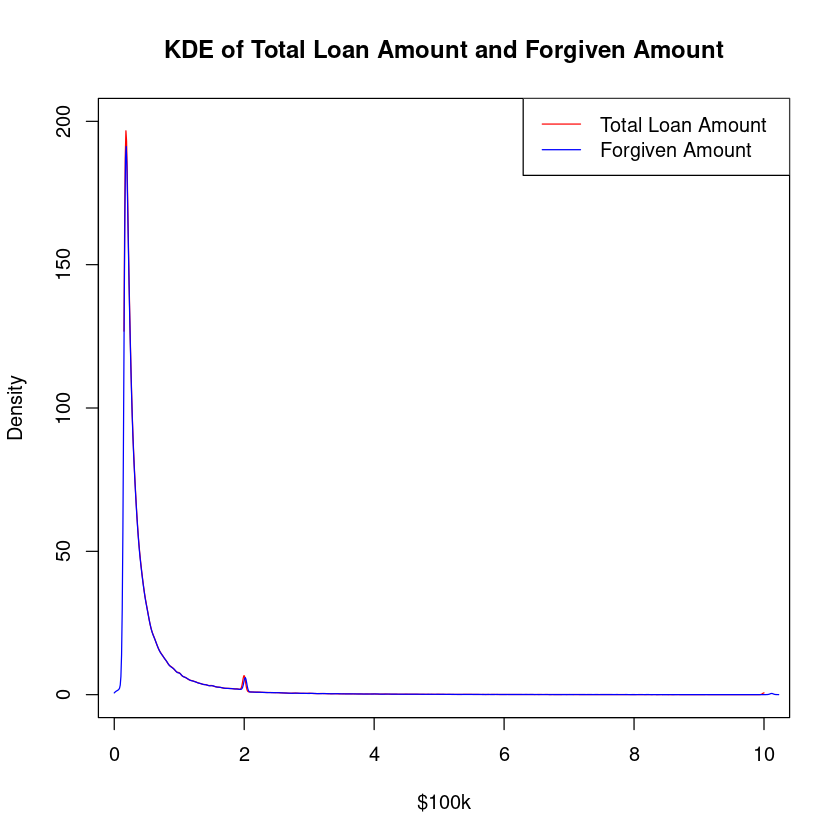

In [41]:
plot(c(min(total),max(total)), c(0,200),
type = 'n',
xlab = '$100k',
ylab = 'Density')
lines(seq(min(total),max(total),length.out = m), est1,
col = 'red')
lines(seq(min(forgive),max(forgive),length.out = m), est2,
col = 'blue')
title('KDE of Total Loan Amount and Forgiven Amount')
legend("topright",legend = c("Total Loan Amount",'Forgiven Amount'),
col = c('red','blue'),
lty = c(1,1))

In [20]:
system("R CMD SHLIB ./C_files/tetrachoric.c")

dyn.load("./C_files/tetrachoric.so")

t_corr <- function(x,y){

    x <- as.integer(x)
    y <- as.integer(y)

    n <- as.integer(length(x))

    res <- integer(1)

    a <- .C("tetrachoric", n=n,x=x,y=y,res=res)

    return(a$res)

}

In [52]:
PPP$RuralUrbanIndicator

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 [1441] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

In [30]:
PPP$RuralUrbanIndicator <- ifelse(PPP$RuralUrbanIndicator == 'R', 1, 0) 

LoanNumber,DateApproved,SBAOfficeCode,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,⋯,JobsReported,NAICSCode,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,ForgivenessAmount,ForgivenessDate,BorrowerFIPS
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1517597200,04/15/2020,459,ACTION ENTERPRISE HOLDINGS LLC,204 20TH ST N,BIRMINGHAM,AL,35203,08/05/2021,Paid in Full,⋯,499,484220,Limited Liability Company(LLC),2408,Regions Bank,BIRMINGHAM,AL,10124658,07/27/2021,01073
4982277110,04/13/2020,459,"MAYNARD COOPER & GALE, PC.",1901 6TH AVE N Ste 2400,BIRMINGHAM,AL,35203,09/24/2021,Paid in Full,⋯,465,541110,Corporation,2408,Regions Bank,BIRMINGHAM,AL,10132329,08/18/2021,01073
3354487304,04/29/2020,459,SECURITY ENGINEERS INC,1617 3rd Ave N,BIRMINGHAM,AL,35203,07/20/2021,Paid in Full,⋯,500,561612,Corporation,102000,First Source FCU,NEW HARTFORD,NY,6943291,06/11/2021,01073
5161177003,04/05/2020,459,BALCH & BINGHAM LLP,1901 6TH AVE N Ste 1500,BIRMINGHAM,AL,35203,07/20/2021,Paid in Full,⋯,381,541110,Partnership,102000,First Source FCU,NEW HARTFORD,NY,6939332,06/09/2021,01073
1420668709,03/27/2021,459,BIRMINGHAM JEFFERSON CIVIC CENTER AUTHORITY,2100 Richard Arrington Jr Blvd N,Birmingham,AL,35203,06/07/2022,Paid in Full,⋯,238,711310,Corporation,2408,Regions Bank,BIRMINGHAM,AL,4775943,03/24/2022,01073
3973897210,04/27/2020,459,"DIOCESE OF BIRMINGHAM IN ALABAMA, A CORPORATION SOLE",2121 3rd Avenue North,Birmingham,AL,35203,06/05/2020,Paid in Full,⋯,496,813110,Non-Profit Organization,455251,Oakworth Capital Bank,BIRMINGHAM,AL,3158599,06/15/2021,01073


In [61]:
county_data <- PPP %>%
group_by(BorrowerFIPS) %>%
summarise_at(.,.vars = vars(CurrentApprovalAmount, ForgivenessAmount), 
.funs = list(sum = sum, mean = mean), na.rm = T)

rural_pcts <- PPP %>%
group_by(BorrowerFIPS) %>%
summarize(rural_pct = sum(RuralUrbanIndicator)/length(RuralUrbanIndicator))

county_data <- county_data %>%
merge(rural_pcts, by = 'BorrowerFIPS')

county_data %>% write.csv("./county_level_data.csv")

In [2]:
county_data <- read.csv("./county_level_data.csv")

In [21]:
system('R CMD SHLIB ./C_files/kre.c')

dyn.load('./C_files/kre.so')

krg <- function(x,y,m, g = NULL, bw = NULL){

    x <- as.double(x)
    y <- as.double(y)

    n <- as.integer(length(x))
    m <- as.integer(m)

    
    if(is.null(g)){ 
        g <- as.double(seq(min(x),max(x),length.out = m))
    }

    if(is.null(bw)){
        bw <- as.double(1.06 * min(sd(x),IQR(x)) * n^(-1/5))
    }

    est <- double(m)

    a <- .C('NW_estimate', x=x,y=y,n=n,b=bw,g=g,m=m,est=est)

    return(a)

}

kern_reg <- function(x,y,m,ci = F){

    r <- krg(x,y,m)

    bw <- r$b
    g <- r$g
    estimate <- r$est

    if(ci == T){

        n <- length(x)

        res_mat <- matrix(nrow = m, ncol = 200)

        rownames(res_mat) <- paste0("m",1:m)

        for (i in 1:200){        

            indices <- sample(1:n, 2000, replace = T)

            x_samp <- x[indices]
            y_samp <- y[indices]

            a <- krg(x_samp,y_samp,m,g = g, bw = bw)

            res_mat[,i] <- a$est
        }

        conf_ints <- res_mat %>%
        apply(1,quantile, probs = c(.025, .975)) %>%
        t()

        return(list(est = estimate, conf_ints = conf_ints))
    }

    return(estimate)

}

In [22]:
x <- county_data$rural_pct

y <- county_data$ForgivenessAmount_mean

z <- kern_reg(x,y,1000,ci=T)

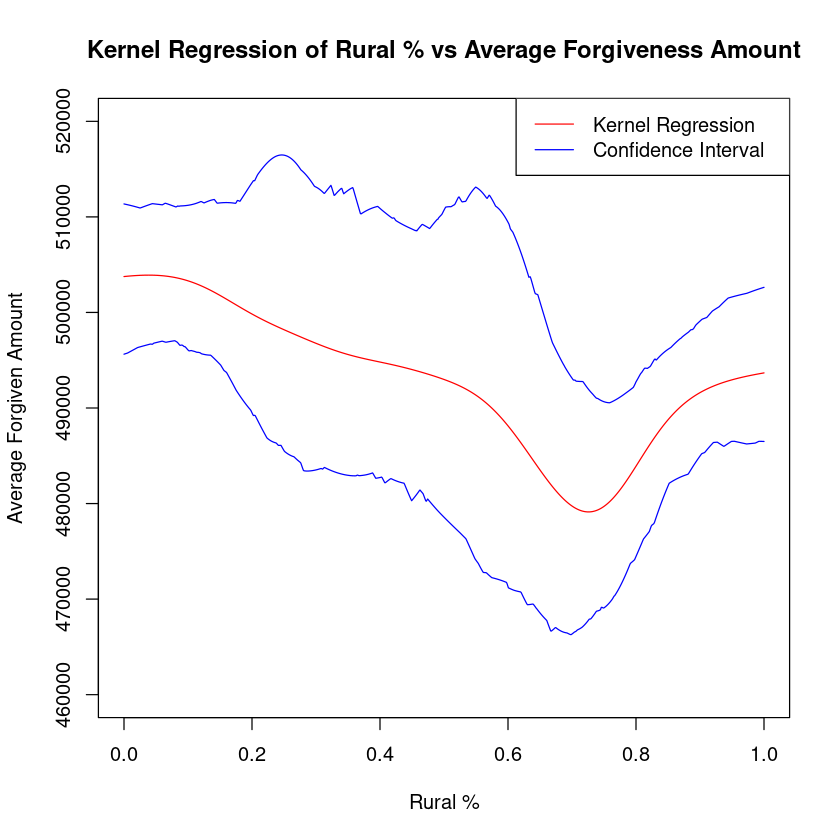

In [42]:
plot(c(min(x),max(x)),
c(4.6e5, 5.2e5),
type = 'n',
xlab = 'Rural %',
ylab = 'Average Forgiven Amount')
lines(seq(min(x),max(x),length.out = 1000),
z$est,
col = 'red')
lines(seq(min(x),max(x),length.out = 1000),
z$conf_ints[,1],
col = 'blue')
lines(seq(min(x),max(x),length.out = 1000),
z$conf_ints[,2],
col = 'blue')
title("Kernel Regression of Rural % vs Average Forgiveness Amount")
legend("topright",legend = c("Kernel Regression", "Confidence Interval"),
col = c("red","blue"), lty = c(1,1))

In [45]:
unr <- read.csv("./unemployment_clean.csv", header = T)

unr

BorrowerFIPS,X2019_q1,X2019_q2,X2019_q3,X2019_q4,X2019_q234_avg,X2020_q1,X2020_q2,X2020_q3,X2020_q4,X2020_q234_avg,X2021_q1,X2021_q2,X2021_q3,X2021_q4,X2021_q234_avg
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,3.533333,2.633333,2.800000,2.500000,2.644444,3.400000,9.033333,5.600000,3.566667,6.066667,3.233333,2.933333,2.866667,2.233333,2.677778
1003,3.733333,2.666667,2.733333,2.566667,2.655556,3.500000,11.233333,6.266667,3.966667,7.155556,3.566667,3.100000,2.900000,2.300000,2.766667
1005,4.733333,3.700000,4.000000,3.566667,3.755556,4.433333,9.900000,9.466667,7.200000,8.855556,6.533333,5.933333,5.833333,4.533333,5.433333
1007,4.033333,3.000000,3.200000,2.733333,2.977778,3.833333,13.133333,7.466667,4.766667,8.455556,4.033333,3.800000,3.533333,2.600000,3.311111
1009,3.500000,2.566667,2.733333,2.433333,2.577778,3.333333,7.600000,4.566667,2.766667,4.977778,2.700000,2.566667,2.400000,1.866667,2.277778
1011,4.400000,3.133333,4.000000,3.933333,3.688889,4.300000,7.833333,6.900000,5.233333,6.655556,4.533333,4.166667,4.133333,3.166667,3.822222
1013,4.533333,3.333333,4.000000,3.666667,3.666667,5.000000,15.866667,10.600000,7.166667,11.211111,5.966667,5.466667,5.400000,4.366667,5.077778
1015,4.666667,3.466667,3.566667,3.200000,3.411111,4.333333,13.600000,8.000000,5.100000,8.900000,4.566667,4.400000,4.233333,3.333333,3.988889
1017,3.733333,2.800000,3.100000,2.633333,2.844444,3.700000,13.733333,7.733333,4.966667,8.811111,4.400000,3.966667,3.633333,2.766667,3.455556
